# Comparison of Consumer Price Indexes of United States Key Metropolitan Areas During President Obama Presidency

According to U.S. [Bureau Of Labor Statistics](https://www.bls.gov/cpi/) (BLS), Consumer Price Index (CPI) is defined as the “measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. Indexes are available for the U.S. and various geographic areas. Average price data for select utility, automotive fuel, and food items are also available.”. The BLS calculates the CPI as a [weighted average](https://www.investopedia.com/terms/w/weightedaverage.asp) of prices for a basket of goods and services representative of aggregate U.S. consumer spending.

CPI is one of the more popular means of measuring inflation (or deflation). Historically, CPI has been increasing over time. Consumer prices have been up by 3.5% from March 2023 to March 2024 [[1](https://www.bls.gov/opub/ted/2024/consumer-prices-up-3-5-percent-from-march-2023-to-march-2024.htm)]. This includes an increase of 2.2% in food. While the petroleum prices rose 7.5% over the year; prices for natural gas fell 50.3% [[2](https://www.bls.gov/opub/ted/2024/u-s-import-prices-up-0-4-percent-over-the-year-ended-march-2024.htm)].

The BLS collects about 80,000 prices monthly from around 23,000 retail and service establishments; and publishes two indexes each month. The Consumer Price Index for All Urban Consumers (CPI-U) represents 93% of the U.S. population not living in remote rural areas. The eight major groups of CPI are: Food and Beverages, Housing, Apparel, Transportation, Education and Communication, Medical Care, Recreation and Other Goods and Services.

The CPI is widely used by financial market participants to gauge inflation and by the Federal Reserve to calibrate its monetary policy. Businesses and consumers also use the CPI to make informed economic decisions. Since CPI measures the change in consumers’ purchasing power, it is often a key factor in pay negotiations.

###  Objective of the project:

The project aims to looks at CPI data published by the BLS over a period ranging 1984 to 2023, and visualize how CPI has changed over time. Finally, it analyzes Barack Obama’s term as President and looks at how CPI for major Metropolitan areas evolved from the start of his presidency until the end of this second term presidency using Principal Component Analysis and Single Value Decomposition.

The CPI is computed not only at the national level but also for specific regions and metropolitan areas within the United States.

Each metropolitan area has its own CPI, which reflects local price variations. The CPI for metropolitan areas provides a more localized view of inflation trends. The CPI for metropolitan areas includes major cities and their surrounding regions.
To get started, the following cell imports the necessary libraries needed in the notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The cell below imports the widgets functionality that will be used to view the evolution of CPI in the Metropolitan areas.

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

The data is present as csv files, with each file corresponding to the Metropolitan areas. The areas in concern are: 1. Anchorage, AK 2. Chicago-Gary-Kenosha, IL-IN-WI 3. Detroit-Ann Arbor-Flint, MI 4. Houston-Galveston-Brazoria, TX 5. Kansas City, MO-KS 6. Los Angeles-Riverside-Orange County, CA 7. Miami-Fort Lauderdale, FL 8. New York-Northern New Jersey-Long Island, NY-NJ-CT-PA 9. Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD 10. Pittsburgh, PA 11. San Francisco-Oakland-San Jose, CA 12. Seattle-Tacoma-Bremerton, WA 13. St. Louis, MO-IL 14. Atlanta, GA

The files are loaded into the notebook using a simple ```load_file``` function and stored as a respective Pandas DataFrame.

In [4]:
def load_file(area):
    file = area + '.csv'
    return pd.read_csv(file)

AK = load_file('Anchorage, AK')
IL_IN_WI = load_file('Chicago-Gary-Kenosha, IL-IN-WI')
MI = load_file('Detroit-Ann Arbor-Flint, MI')
TX = load_file('Houston-Galveston-Brazoria, TX')
MO_KS = load_file('Kansas City, MO-KS')
CA1 = load_file('Los Angeles-Riverside-Orange County, CA')
FL = load_file('Miami-Fort Lauderdale, FL')
NY_NJ_CT_PA = load_file('New York-Northern New Jersey-Long Island, NY-NJ-CT-PA')
PA_NJ_DE_MD = load_file('Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD')
PA = load_file('Pittsburgh, PA')
CA2 = load_file('San Francisco-Oakland-San Jose, CA')
WA = load_file('Seattle-Tacoma-Bremerton, WA')
MO_IL = load_file('St. Louis, MO-IL')
GA = load_file('Atlanta, GA')

print('All files loaded...')

All files loaded...


### Dataset

Now that the datasets have been loaded as DataFrames, they need to be analyzed and cleaned. Looking at one of the DataFrames, it is seen that it contains a ```DATE``` column, and the rest of the columns contain float numbers representing the major groups of CPI as explained earlier. However, it contains column names that are unreadable, numbers stored as strings, missing values, etc.

Let’s look at ```TX``` DataFrame.

In [5]:
TX.head()

,DATE,CUUSA318SAF,CUUSA318SAH,CUUSA318SAA,CUUSA318SAT,CUUSA318SAR,CUUSA318SAE,CUUSA318SAG
0,1984-01-01,103.8,99.5,101.0,101.2,.,.,105.4
1,1984-07-01,104.8,100.3,102.7,105.4,.,.,109.0
2,1985-01-01,104.9,100.2,104.1,105.4,.,.,111.1
3,1985-07-01,105.0,100.1,104.7,106.9,.,.,113.9
4,1986-01-01,106.4,98.5,105.8,101.2,.,.,116.7


Let’s look at the data types.

In [6]:
TX.dtypes

DATE            object
CUUSA318SAF    float64
CUUSA318SAH    float64
CUUSA318SAA    float64
CUUSA318SAT    float64
CUUSA318SAR     object
CUUSA318SAE     object
CUUSA318SAG    float64
dtype: object

The DataFrames are stored in a list ```met_areas```.

In [7]:
met_areas = [AK, IL_IN_WI, MI, TX, MO_KS, CA1, FL, NY_NJ_CT_PA, PA_NJ_DE_MD, PA, CA2, WA, MO_IL, GA]

The following code cell renames the column names and changes the ```DATE``` column to ```datatime``` value from ```string```.

In [8]:
for area in met_areas:
    area.rename(columns = {area.columns[1] : 'FOOD_BEVERAGES', \
                           area.columns[2] : 'HOUSING', \
                           area.columns[3] : 'APPAREL', \
                           area.columns[4] : 'TRANSPORTATION', \
                           area.columns[5] : 'RECREATION', \
                           area.columns[6] : 'EDUCATION', \
                           area.columns[7] : 'OTHER_SERVICES'}, \
                inplace = True)
    area['DATE'] = pd.to_datetime(area['DATE'])
    
print('Column names have been renamed...')

Column names have been renamed...


The following code cell replaces missing values with ```NaN``` and changes the dtype from ```string``` to ```float```.

In [9]:
for area in met_areas:
    area_recr = area['RECREATION'].copy()
    area_recr[area_recr == '.'] = np.nan
    area['RECREATION'] = area_recr
    area['RECREATION'] = area['RECREATION'].astype(float)
    
    area_edu = area['EDUCATION'].copy()
    area_edu[area_edu == '.'] = np.nan
    area['EDUCATION'] = area_edu
    area['EDUCATION'] = area['EDUCATION'].astype(float)

Observe the ```dtypes``` of the columns and the first five and last five rows of the ```TX``` DataFrame.

In [10]:
TX.dtypes

DATE              datetime64[ns]
FOOD_BEVERAGES           float64
HOUSING                  float64
APPAREL                  float64
TRANSPORTATION           float64
RECREATION               float64
EDUCATION                float64
OTHER_SERVICES           float64
dtype: object

In [11]:
TX.head()

,DATE,FOOD_BEVERAGES,HOUSING,APPAREL,TRANSPORTATION,RECREATION,EDUCATION,OTHER_SERVICES
0,1984-01-01,103.8,99.5,101.0,101.2,NaN,NaN,105.4
1,1984-07-01,104.8,100.3,102.7,105.4,NaN,NaN,109.0
2,1985-01-01,104.9,100.2,104.1,105.4,NaN,NaN,111.1
3,1985-07-01,105.0,100.1,104.7,106.9,NaN,NaN,113.9
4,1986-01-01,106.4,98.5,105.8,101.2,NaN,NaN,116.7


In [12]:
TX.tail()

,DATE,FOOD_BEVERAGES,HOUSING,APPAREL,TRANSPORTATION,RECREATION,EDUCATION,OTHER_SERVICES
75,2021-07-01,250.054,238.256,174.596,203.996,115.232,123.996,429.488
76,2022-01-01,264.554,246.137,179.275,230.834,124.382,123.438,440.148
77,2022-07-01,281.569,254.726,177.290,230.667,128.353,120.527,446.982
78,2023-01-01,289.825,259.317,175.647,228.958,130.354,121.141,469.140
79,2023-07-01,295.901,266.069,180.155,235.160,128.259,120.499,480.830


Within the following code cell, a very interesting interactive widget is embedded. Running the code cell will plot a graph displaying the CPI indexes spread over years for all the different categories, and selecting the Metropolitan areas from the widget dropdown menu updates the graph dynamically.

In [13]:
met_area_df = {'Anchorage, AK' : AK,
             'Chicago-Gary-Kenosha, IL-IN-WI' : IL_IN_WI,\
             'Detroit-Ann Arbor-Flint, MI' : MI,\
             'Houston-Galveston-Brazoria, TX' : TX,\
             'Kansas City, MO-KS' : MO_KS,\
             'Los Angeles-Riverside-Orange County, CA' : CA1,\
             'Miami-Fort Lauderdale, FL' : FL,\
             'New York-Northern New Jersey-Long Island, NY-NJ-CT-PA' : NY_NJ_CT_PA,\
             'Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD' : PA_NJ_DE_MD,\
             'Pittsburgh, PA' : PA,\
             'San Francisco-Oakland-San Jose, CA' : CA2,\
             'Seattle-Tacoma-Bremerton, WA' : WA,\
             'St. Louis, MO-IL' : MO_IL,\
             'Atlanta, GA' : GA}

def plot_data(df_name):
    df = met_area_df[df_name]
    plt.figure(figsize=(15, 7))
    plt.plot(df['DATE'], df['FOOD_BEVERAGES'], label = 'Food and Beverages')
    plt.plot(df['DATE'], df['HOUSING'], label = 'Housing')
    plt.plot(df['DATE'], df['APPAREL'], label = 'Apparel')
    plt.plot(df['DATE'], df['TRANSPORTATION'], label = 'Transportation')
    plt.plot(df['DATE'], df['RECREATION'], label = 'Recreation')
    plt.plot(df['DATE'], df['EDUCATION'], label = 'Education')
    plt.plot(df['DATE'], df['OTHER_SERVICES'], label = 'Other Services')
    plt.title(f'CPI-U for {df_name} Metropolitan Area')
    plt.xlim(df['DATE'].min(), df['DATE'].max())
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Index 1982 - 1984 = 100")
    plt.show()
    
dropdown = Dropdown(options = met_area_df.keys(), description = 'Met Area')
interact(plot_data, df_name = dropdown)

interactive(children=(Dropdown(description='Met Area', options=('Anchorage, AK', 'Chicago-Gary-Kenosha, IL-IN-…

<function __main__.plot_data(df_name)>

### Principal Component Analysis and Single Value Decomposition to Analyze the Metropolitan Areas during Barack Obama’s Term as President

Barack Obama’s tenure as the $44^{th}$ president of the United States began with his first inauguration on January 20, 2009, and ended on January 20, 2017.

The following code cell pulls from all the Metropolitan DataFrames the CPI index on January-01-2009 and creates a new DataFrame called ```obama_2009```.

**Note: The column names for the Metropolitan DataFrames have now become one of the columns, while the rest of the columns are the areas itself. The values are of CPI indexes from January 2009.**

In [14]:
obama_2009_ = []

for area in met_areas:
    aT = area.set_index('DATE', drop = True).T
    obama_2009_.append(aT['2009-01-01'].values)
    
obama_2009 = pd.DataFrame(obama_2009_,
                          index = met_area_df.keys(), 
                          columns = ['Food and Beverages', 'Housing', 'Apparel', 
                                     'Transportation', 'Recreation', 'Education', 'Other Services'])
obama_2009 = obama_2009.T
obama_2009.reset_index(inplace = True)
obama_2009.rename(columns = {'index' : 'items'}, inplace = True)
obama_2009

,items,"Anchorage, AK","Chicago-Gary-Kenosha, IL-IN-WI","Detroit-Ann Arbor-Flint, MI","Houston-Galveston-Brazoria, TX","Kansas City, MO-KS","Los Angeles-Riverside-Orange County, CA","Miami-Fort Lauderdale, FL","New York-Northern New Jersey-Long Island, NY-NJ-CT-PA","Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD","Pittsburgh, PA","San Francisco-Oakland-San Jose, CA","Seattle-Tacoma-Bremerton, WA","St. Louis, MO-IL","Atlanta, GA"
0,Food and Beverages,192.649,215.120,199.290,200.890,217.153,223.880,225.939,228.188,207.144,217.638,228.280,231.498,210.452,219.561
1,Housing,172.688,213.860,191.345,184.357,192.955,244.823,228.929,256.927,231.247,212.925,246.353,241.473,189.596,201.210
2,Apparel,132.372,92.928,108.823,143.427,108.665,107.175,138.664,112.646,101.574,148.338,112.370,133.801,131.624,123.042
3,Transportation,184.671,164.238,198.519,151.019,168.554,171.951,183.060,183.379,174.981,155.372,161.261,193.456,166.161,161.583
4,Recreation,119.859,111.928,118.241,109.096,124.055,113.800,119.593,116.689,122.995,116.543,106.410,97.954,119.765,106.530
5,Education,109.839,135.654,132.644,111.007,120.085,128.845,115.002,133.641,127.949,135.103,137.182,125.680,132.446,116.236
6,Other Services,297.469,345.023,365.084,315.703,340.630,350.933,285.270,355.782,402.705,361.697,383.873,363.221,286.939,301.245


Principal Component Analysis (PCA) will be used to analyze the data. The first step involves transforming the data so that it has a mean of zero.

In [15]:
obama_2009_raw = obama_2009[met_area_df.keys()].values.T
obama_2009_X = obama_2009_raw - np.mean(obama_2009_raw, axis = 0)

Use Numpy’s ```linalg.svd``` function to calculate ```U```, ```Sigma``` and ```VT```.

In [16]:
U, Sigma, VT = np.linalg.svd(obama_2009_X, full_matrices = False)

Note the shape of ```Sigma```. Numpy stores a diagonal matrix as a vector for efficiency.

In [17]:
print('U:', U.shape)
print('Sigma:', Sigma.shape)
print('VT:', VT.shape)

U: (14, 7)
Sigma: (7,)
VT: (7, 7)


Next we plot the graph of reduced axes where, in the earlier cells, PCA and SVD were used to compress the dimensions of the data from 7 (that is 7 categories of the CPI) to 2.

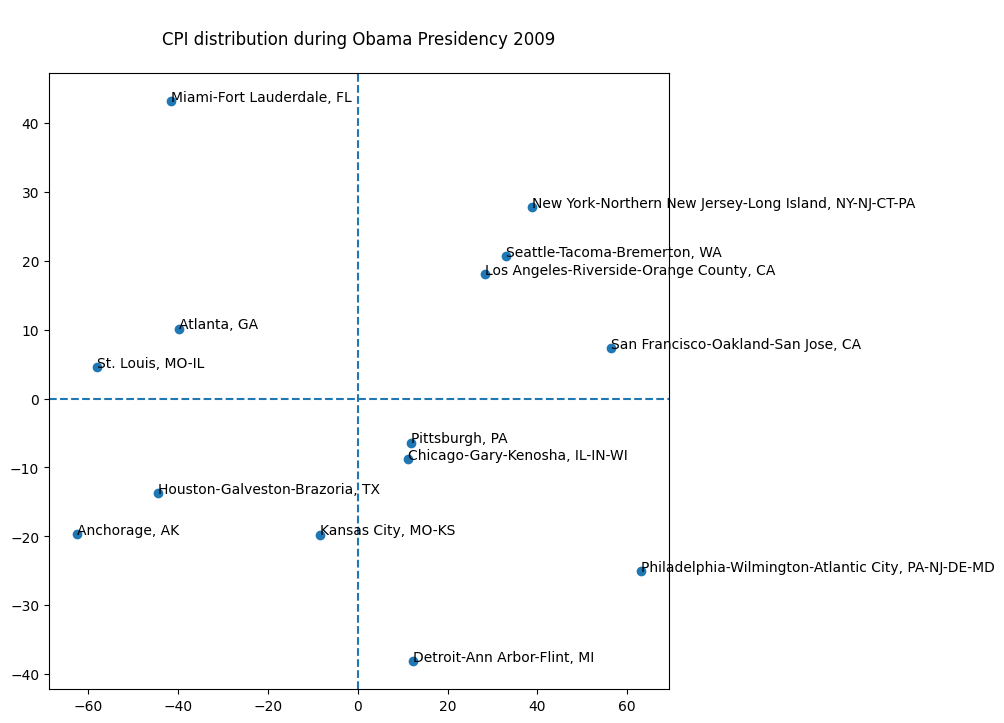

In [18]:
# Project into 2-D
obama_2009_Y_k = obama_2009_X.dot(VT[0:2, :].T)

# Plot
fig = plt.figure(figsize=(8, 8))
plt.scatter(obama_2009_Y_k[:, 0], obama_2009_Y_k[:, 1])
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.title('\nCPI distribution during Obama Presidency 2009\n')
for x, y, label in zip(obama_2009_Y_k[:, 0], obama_2009_Y_k[:, 1], met_area_df.keys()):
    plt.annotate(label, xy=(x, y))

Based on the plot, here are some observations:

- Distribution of CPI Indexes: There is a wide distribution of mean-centered CPI indexes among different metropolitan areas, indicating variability in cost of living adjustments during 2009.

- Positive Values: Cities like Miami-Fort Lauderdale, FL, and New York-Northern New Jersey-Long Island, NY-NJ-CT-PA have positive values, suggesting higher CPI indexes relative to the mean.

- Negative Values: Conversely, Detroit-Ann Arbor-Flint, MI and Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD show negative values, indicating lower CPI indexes relative to the mean.

- Quadrant Analysis: The spread of cities across all four quadrants of the plot reflects the diverse economic landscapes and cost of living differences across the United States during that period.

These insights could be valuable for understanding regional economic trends and policy-making.
The analysis for January 2017 data can be calculated in the same way.

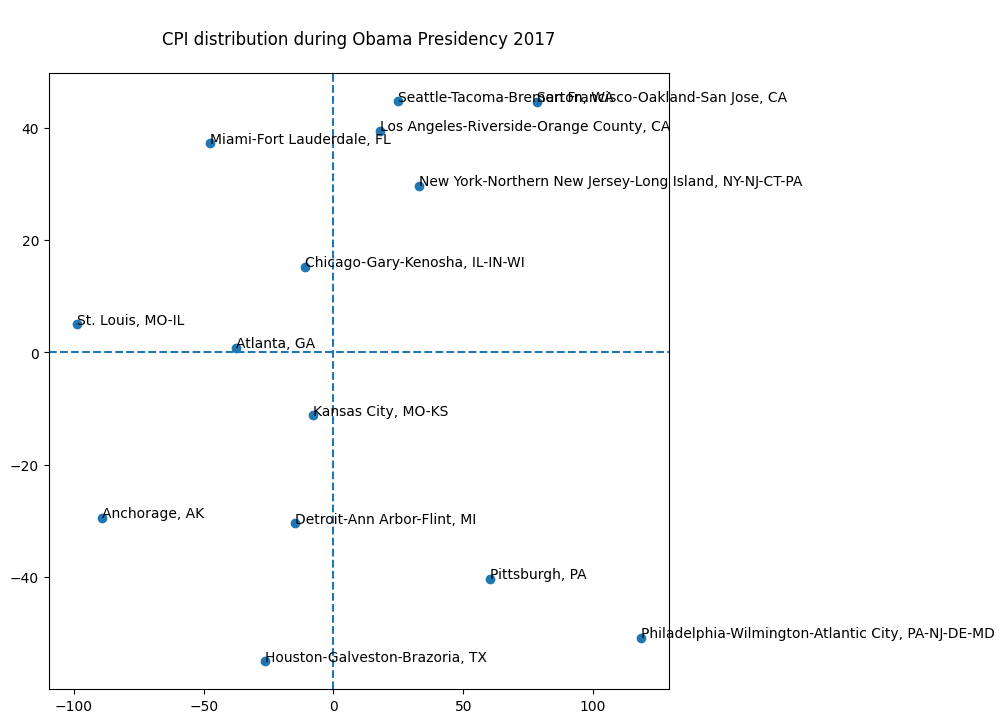

In [19]:
# OBAMA 2017

obama_2017_ = []

for area in met_areas:
    aT = area.set_index('DATE', drop = True).T
    obama_2017_.append(aT['2017-01-01'].values)
    
obama_2017 = pd.DataFrame(obama_2017_,
                          index = met_area_df.keys(), 
                          columns = ['Food and Beverages', 'Housing', 'Apparel', 
                                     'Transportation', 'Recreation', 'Education', 'Other Services'])
obama_2017 = obama_2017.T
obama_2017.reset_index(inplace = True)
obama_2017.rename(columns = {'index' : 'items'}, inplace = True)

obama_2017_raw = obama_2017[met_area_df.keys()].values.T
obama_2017_X = obama_2017_raw - np.mean(obama_2017_raw, axis = 0)

U_, Sigma_, VT_ = np.linalg.svd(obama_2017_X, full_matrices = False)

obama_2017_Y_k = obama_2017_X.dot(VT_[0:2, :].T)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(obama_2017_Y_k[:, 0], obama_2017_Y_k[:, 1])
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.title('\nCPI distribution during Obama Presidency 2017\n')
for x, y, label in zip(obama_2017_Y_k[:, 0], obama_2017_Y_k[:, 1], met_area_df.keys()):
    plt.annotate(label, xy=(x, y))

### Observations

Here are some key observations:

- Shift in Distribution: Some cities have shifted quadrants between 2009 and 2017, indicating changes in their relative CPI indexes.

- Notable Changes:

- Miami-Fort Lauderdale, FL, and Los Angeles-Riverside-Orange County, CA moved from positive to negative quadrants, suggesting a decrease in CPI indexes relative to the mean.

- Houston-Galveston-Brazoria, TX, and Philadelphia-Wilmington-Atlantic City, PA-NJ-DE-MD moved to positive quadrants, indicating an increase in CPI indexes relative to the mean.

- Atlanta, GA and St. Louis, MO-IL: Remains near zero on the x-axis in both plots, showing consistency in its CPI index relative to the mean.

- Scale Difference: The x-axis range has expanded in the 2017 plot, which could imply a greater spread in the data or a change in the scale of measurement.

These observations can provide insights into the economic changes and cost of living adjustments that occurred between 2009 and 2017. It’s important to consider other economic factors that might have influenced these changes when interpreting the plots.

### Future Research

With the data in hand, it would be an interesting project to explore the various political factors that affect these changes. For example, how does political party of a Presidential candidate affect the CPI values. So far we have looked at major metropolitan areas in the U.S., what does the data look like internationally when there are more than two major political parties?

### References

[1] [Consumer prices up 3.5 percent from March 2023 to March 2024.](https://www.bls.gov/opub/ted/2024/consumer-prices-up-3-5-percent-from-march-2023-to-march-2024.htm) April 17, 2024

[2] [U.S. import prices up 0.4 percent over the year ended March 2024.](https://www.bls.gov/opub/ted/2024/u-s-import-prices-up-0-4-percent-over-the-year-ended-march-2024.htm) April 22, 2024